logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5,NaN,S


In [4]:
data = data[["Survived","Pclass","Sex","Age","Fare","SibSp","Parch"]]

In [5]:
data["Sex"] = data["Sex"].map({"male":0,"female":1})

In [6]:
print(data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
SibSp         0
Parch         0
dtype: int64


In [7]:
data["Age"].fillna(data["Age"].mean(),inplace = True)

C:\Users\Rudraksh\AppData\Local\Temp\ipykernel_9116\450382181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(),inplace = True)


In [8]:
x = data.drop("Survived",axis = 1)
y = data["Survived"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [11]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [12]:
print("accu",accuracy_score(y_test,y_pred))

accu 0.8100558659217877


In [13]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[86 17]
 [17 59]]


In [14]:
new_pass = pd.DataFrame({
    'Pclass':[2],
    'Sex':[1],
    'Age':[25],
    'Fare':[50],
    'SibSp':[0],
    'Parch':[1]
})

In [15]:
predict = model.predict(new_pass)
prob = model.predict_proba(new_pass)
print(predict)
print(prob[0][1])

[1]
0.8340713638646357


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

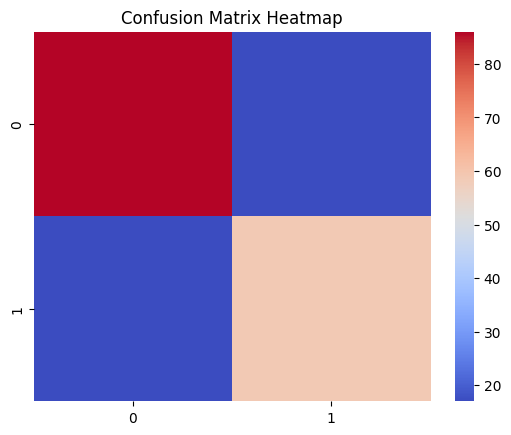

In [ ]:
sns.heatmap(cm,cmap="coolwarm")
plt.title("Confusion Matrix Heatmap")

Text(50.72222222222221, 0.5, 'True Label')

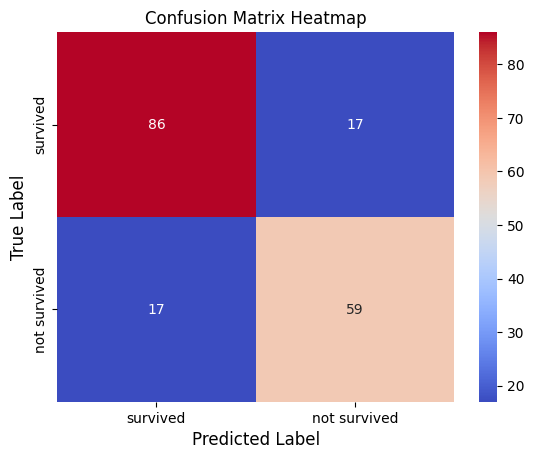

In [ ]:
class_names = ["survived", "not survived"]  
sns.heatmap(
    cm,annot=True,         
    cmap="coolwarm",       
    cbar=True,              
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
